In [289]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np
import re

In [291]:
#Load the data
file_path = r'C:\Users\xbarc\Downloads\Pablo Longoria OM Mercato History.csv'  
df = pd.read_csv(file_path)

In [293]:
# Step 6: Display the first few rows of the reshaped data
print(df.head())

                   Pablo Longoria Position Mercato Season       Date  \
0  Managing Director Professional Football         Summer   9/1/2020   
1  Managing Director Professional Football         Summer   7/1/2020   
2  Managing Director Professional Football         Summer   7/1/2020   
3  Managing Director Professional Football         Summer   8/1/2020   
4  Managing Director Professional Football         Summer  10/1/2020   

     Name of Player  Age              Position               Club  \
0      Luis Enrique   18                Winger           Botafogo   
1  Leonardi Balerdi   21      Central Defender  Borussia Dortmund   
2        Pape Gueye   21  Defensive Midfielder           Le Havre   
3     Yuto Nagatomo   33             Left-Back        Galatasaray   
4  Michael Cuisance   21    Central Midfielder      Bayern Munich   

  Country of Championship Citizenship     Price         Fee   \
0                  Brazil      Brazil  Transfer   8 000 000    
1                 German

In [295]:
df.shape

(73, 14)

In [297]:
df.dtypes

Pablo Longoria Position                         object
Mercato Season                                  object
Date                                            object
Name of Player                                  object
Age                                              int64
Position                                        object
Club                                            object
Country of Championship                         object
Citizenship                                     object
Price                                           object
 Fee                                            object
Agent/Agency                                    object
 Transfermrkt Valuation at time of transfer     object
First Team Coach                                object
dtype: object

In [299]:
# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Print available columns
print("Available Columns:", df.columns.tolist())

# Function to clean monetary values
def clean_currency(value):
    if isinstance(value, str):
        value = value.replace(" ", "").replace(",", "")
        try:
            num_value = float(value)
            return int(num_value) if num_value.is_integer() else num_value
        except ValueError:
            return 0  
    return value if pd.notna(value) else 0  

# Rename 'Price' column to 'Type of Transaction'
df.rename(columns={"Price": "Type of Transaction"}, inplace=True)

# Apply cleaning function to relevant columns
df["Fee"] = df["Fee"].apply(clean_currency)
df["Transfermrkt Valuation at time of transfer"] = df["Transfermrkt Valuation at time of transfer"].apply(clean_currency)

# Convert columns to numeric
df["Fee"] = pd.to_numeric(df["Fee"], errors="coerce").fillna(0).astype(int) 
df["Transfermrkt Valuation at time of transfer"] = pd.to_numeric(
    df["Transfermrkt Valuation at time of transfer"], errors="coerce"
).fillna(0)

print(df.head())

Available Columns: ['Pablo Longoria Position', 'Mercato Season', 'Date', 'Name of Player', 'Age', 'Position', 'Club', 'Country of Championship', 'Citizenship', 'Price', 'Fee', 'Agent/Agency', 'Transfermrkt Valuation at time of transfer', 'First Team Coach']
                   Pablo Longoria Position Mercato Season       Date  \
0  Managing Director Professional Football         Summer   9/1/2020   
1  Managing Director Professional Football         Summer   7/1/2020   
2  Managing Director Professional Football         Summer   7/1/2020   
3  Managing Director Professional Football         Summer   8/1/2020   
4  Managing Director Professional Football         Summer  10/1/2020   

     Name of Player  Age              Position               Club  \
0      Luis Enrique   18                Winger           Botafogo   
1  Leonardi Balerdi   21      Central Defender  Borussia Dortmund   
2        Pape Gueye   21  Defensive Midfielder           Le Havre   
3     Yuto Nagatomo   33         

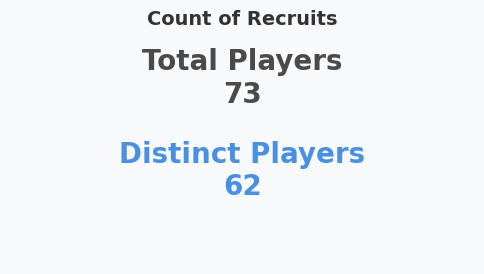

In [301]:
# Calculate KPIs
total_players = df.shape[0]  
distinct_players = df["Name of Player"].nunique()  

# Plot KPI Cards
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_facecolor("#f8f9fa")  
fig.patch.set_facecolor("#f8f9fa")

# Remove borders and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Add KPI metrics as text
ax.text(0.5, 0.7, f"Total Players\n{total_players}", fontsize=20, ha="center", weight="bold", color="#4a4a4a")
ax.text(0.5, 0.3, f"Distinct Players\n{distinct_players}", fontsize=20, ha="center", weight="bold", color="#4a90e2")

# Title
ax.set_title("Count of Recruits", fontsize=14, weight="bold", color="#333")

# Show Plot
plt.show()

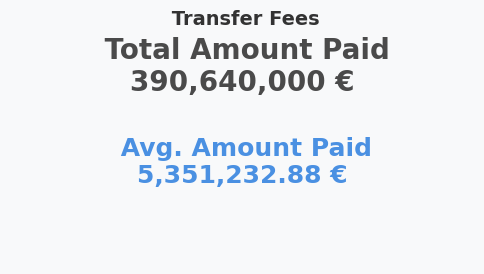

In [303]:
def clean_currency(value):
    if isinstance(value, str):
        return int(value.replace(" ", "").replace(",", ""))
    return value

# Calculate KPI Metrics
total_players = df.shape[0]  
total_amount_paid = df["Fee"].sum()  
average_amount_paid = total_amount_paid / total_players 

# Plot KPI Cards
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_facecolor("#f8f9fa")  
fig.patch.set_facecolor("#f8f9fa")

# Remove borders and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Add KPI metrics as text
ax.text(0.5, 0.75, f" Total Amount Paid\n{total_amount_paid:,} €", fontsize=20, ha="center", weight="bold", color="#4a4a4a")
ax.text(0.5, 0.35, f" Avg. Amount Paid\n{average_amount_paid:,.2f} €", fontsize=18, ha="center", weight="bold", color="#4a90e2")

# Title
ax.set_title(" Transfer Fees", fontsize=14, weight="bold", color="#333")

# Show Plot
plt.show()

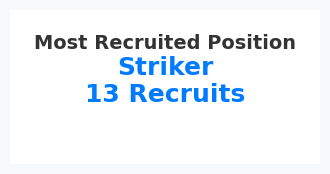

In [305]:
#Count the most recruited position
position_counts = df["Position"].value_counts()
most_recruited_position = position_counts.idxmax()  
most_recruited_count = position_counts.max()  

#Define KPI details
kpi_title = "Most Recruited Position"
kpi_value = f"{most_recruited_position}\n{most_recruited_count} Recruits"
kpi_color = "#007BFF"  

#Create KPI Card
fig, ax = plt.subplots(figsize=(4, 2))  
fig.patch.set_facecolor("#f8f9fa")  
ax.set_facecolor("#ffffff")  

# Remove axis borders and ticks
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

#Add KPI Text
ax.text(0.5, 0.75, kpi_title, fontsize=14, ha="center", weight="bold", color="#333")
ax.text(0.5, 0.4, kpi_value, fontsize=18, ha="center", weight="bold", color=kpi_color)

#Show KPI Card
plt.show()

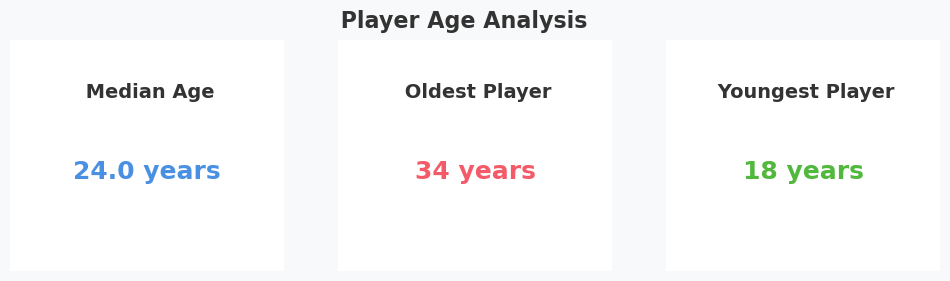

In [307]:
# Calculate KPIs
median_age = df["Age"].median()
oldest_age = df["Age"].max()
youngest_age = df["Age"].min()

# Define KPI Data
kpi_titles = [" Median Age", " Oldest Player", " Youngest Player"]
kpi_values = [f"{median_age:.1f} years", f"{oldest_age} years", f"{youngest_age} years"]
kpi_colors = ["#4a90e2", "#f45b69", "#50b83c"]

# Create KPI Cards
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
fig.patch.set_facecolor("#f8f9fa")  

for ax, title, value, color in zip(axes, kpi_titles, kpi_values, kpi_colors):
    ax.set_facecolor("#ffffff")  
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add KPI Text
    ax.text(0.5, 0.75, title, fontsize=14, ha="center", weight="bold", color="#333")
    ax.text(0.5, 0.4, value, fontsize=18, ha="center", weight="bold", color=color)

# Title
fig.suptitle(" Player Age Analysis", fontsize=16, weight="bold", color="#333")

# Show KPI Cards
plt.show()

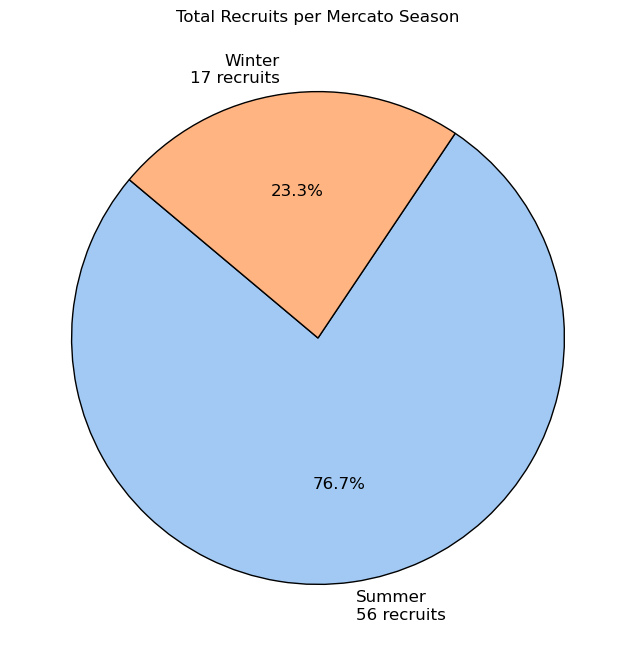

In [309]:
#Count the number of recruits per season
season_counts = df["Mercato Season"].value_counts()

#Create labels with both count and percentage
labels = [f"{season}\n{count} recruits" for season, count in zip(season_counts.index, season_counts.values)]

#Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    season_counts, 
    labels=labels,  
    autopct='%1.1f%%', 
    startangle=140,  
    colors=sns.color_palette("pastel"),  
    wedgeprops={'edgecolor': 'black'},  
    textprops={'fontsize': 12}  
)

#Customize the title
plt.title("Total Recruits per Mercato Season")

#Improve label visibility
for text in texts:
    text.set_fontsize(12)  
for autotext in autotexts:
    autotext.set_fontsize(12)  

# Step 6: Show the plot
plt.show()

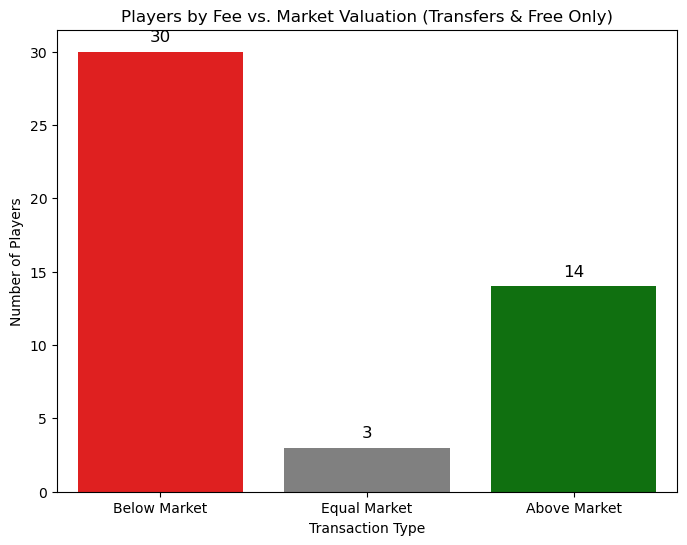

In [311]:
#Filter data to exclude 'Loan' transactions
filtered_df = df[df["Type of Transaction"].isin(["Transfer", "Free"])]

#Compare 'Fee' to 'Transfermrkt Valuation at time of transfer'
below_market = (filtered_df["Fee"] < filtered_df["Transfermrkt Valuation at time of transfer"]).sum()
equal_market = (filtered_df["Fee"] == filtered_df["Transfermrkt Valuation at time of transfer"]).sum()
above_market = (filtered_df["Fee"] > filtered_df["Transfermrkt Valuation at time of transfer"]).sum()

#Prepare data for plotting
categories = ["Below Market", "Equal Market", "Above Market"]
counts = [below_market, equal_market, above_market]
df_plot = pd.DataFrame({"Transaction Type": categories, "Count": counts})

#Create a bar chart 
plt.figure(figsize=(8, 6))
bars = sns.barplot(
    x="Transaction Type", 
    y="Count", 
    hue="Transaction Type",  
    data=df_plot, 
    palette={"Below Market": "red", "Equal Market": "gray", "Above Market": "green"},
    legend=False  
)

#Add value labels
for bar in bars.containers:
    bars.bar_label(bar, fmt="%d", fontsize=12, padding=5)

#Customize labels
plt.title("Players by Fee vs. Market Valuation (Transfers & Free Only)")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Players")

#Show the plot
plt.show()

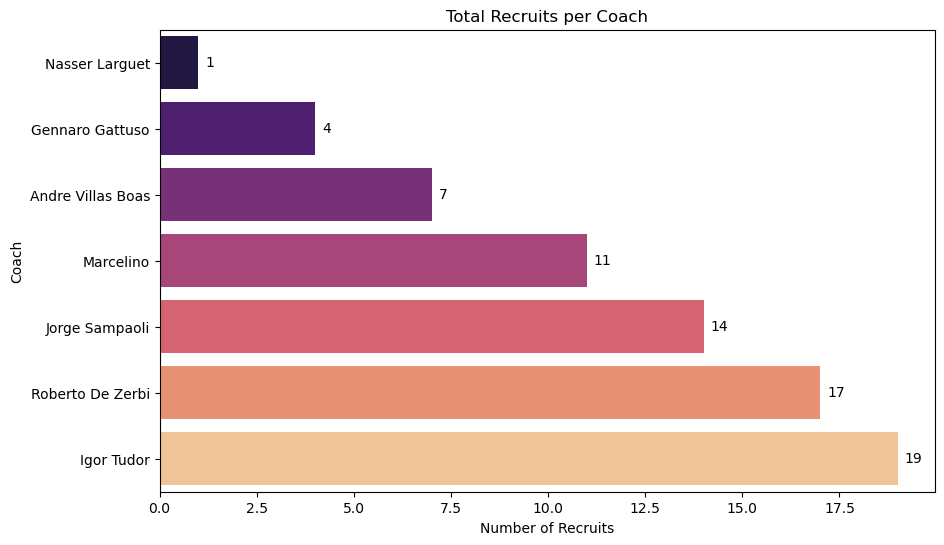

In [313]:
#Count the number of recruits per coach
coach_counts = df["First Team Coach"].value_counts().reset_index()
coach_counts.columns = ["Coach", "Total Recruits"]

#Sort the data by the number of recruits (descending)
coach_counts = coach_counts.sort_values(by="Total Recruits", ascending=True)  # Sort for horizontal bars

#Create the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x="Total Recruits", 
    y="Coach", 
    hue="Coach",  
    data=coach_counts, 
    palette="magma",  
    legend=False  
)

#Add value labels on bars
for bar in bars.containers:
    bars.bar_label(bar, fmt="%d", fontsize=10, padding=5)

#Customize labels
plt.title("Total Recruits per Coach")
plt.xlabel("Number of Recruits")
plt.ylabel("Coach")

#Show the plot
plt.show()

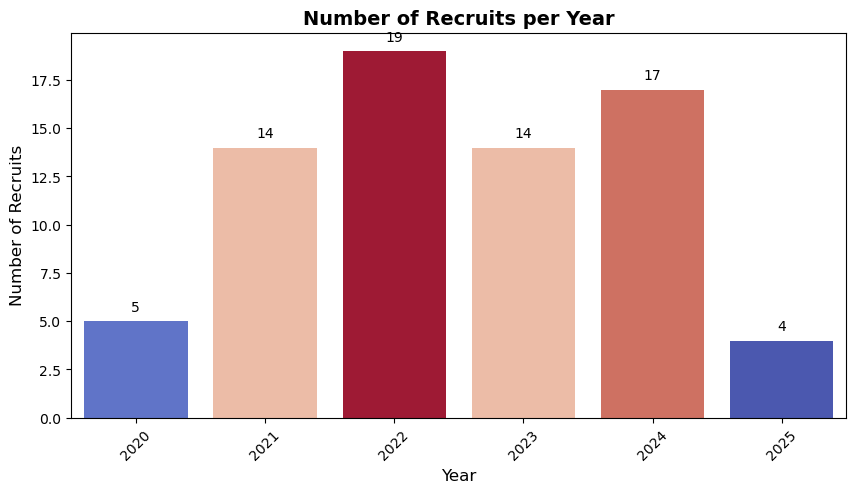

In [315]:
#Convert 'Date' column to datetime format and extract the year
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Convert to datetime
df["Year"] = df["Date"].dt.year  # Extract the year

#Count the number of recruits per year
year_counts = df["Year"].value_counts().reset_index()
year_counts.columns = ["Year", "Total Recruits"]

#Sort by year (ascending order)
year_counts = year_counts.sort_values(by="Year")

#Create the bar chart
plt.figure(figsize=(10, 5))
bars = sns.barplot(
    x="Year", 
    y="Total Recruits",
     hue="Total Recruits",
    data=year_counts, 
    palette="coolwarm",
    legend=False
)

#Add value labels on bars
for bar in bars.containers:
    bars.bar_label(bar, fmt="%d", fontsize=10, padding=5)

#Customize labels
plt.title("Number of Recruits per Year", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Recruits", fontsize=12)
plt.xticks(rotation=45)  

#Show the plot
plt.show()

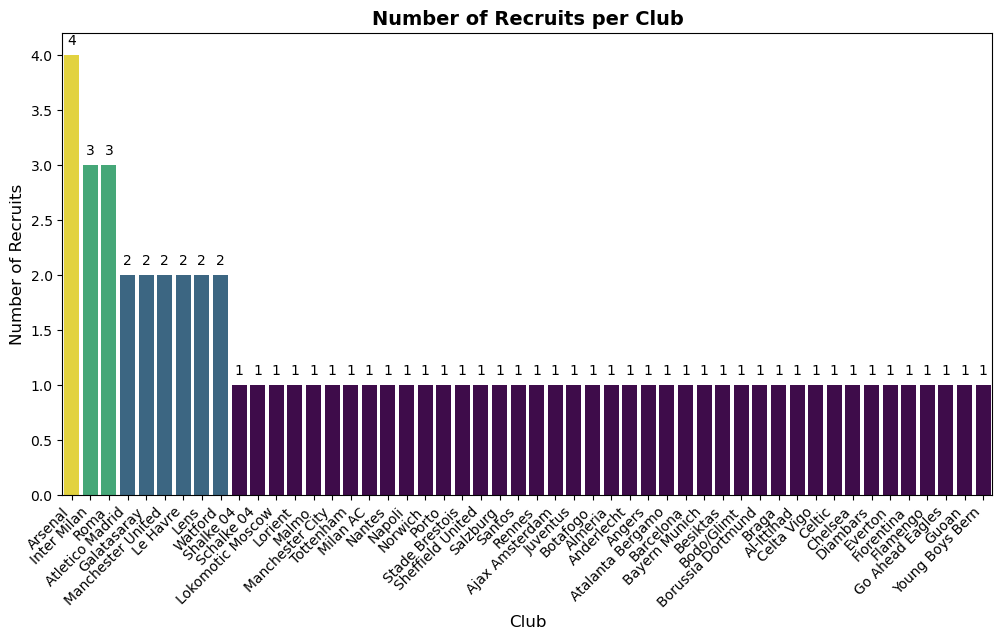

In [333]:
#Count the number of distinct recruits per club
club_counts = df.groupby("Club")["Name of Player"].nunique().reset_index()
club_counts.columns = ["Club", "Distinct Recruits"]

#Sort clubs by the number of distinct recruits (descending)
club_counts = club_counts.sort_values(by="Distinct Recruits", ascending=False)

#Create the bar chart
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x="Club", 
    y="Distinct Recruits",
    hue="Distinct Recruits",
    data=club_counts,    
    palette="viridis",
    legend=False
)

#Add value labels on bars
for bar in bars.containers:
    bars.bar_label(bar, fmt="%d", fontsize=10, padding=5)

#Customize labels
plt.title("Number of Recruits per Club", fontsize=14, fontweight="bold")
plt.xlabel("Club", fontsize=12)
plt.ylabel("Number of Recruits", fontsize=12)
plt.xticks(rotation=45, ha="right")  

#Show the plot
plt.show()

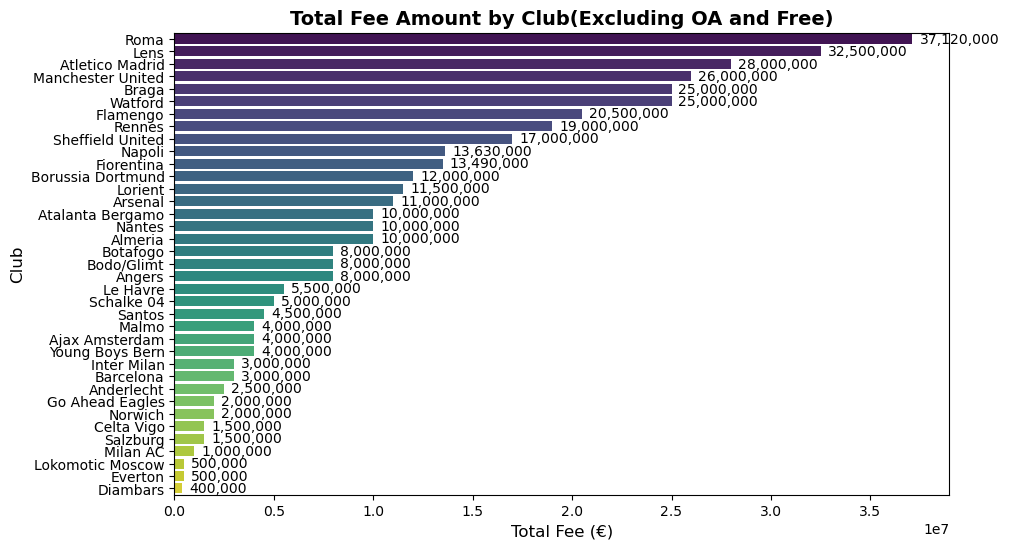

In [319]:
#Group by 'Club' to calculate total fees
club_fees = df.groupby("Club", observed=False)["Fee"].sum().reset_index()

#Sort values by total fee amount (descending)
club_fees = club_fees.sort_values(by="Fee", ascending=False)

#Filter out clubs where total fee is 0
club_fees = club_fees[club_fees["Fee"] > 0]

#Create the bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x="Fee", 
    y="Club", 
    hue="Club", 
    data=club_fees, 
    palette=dict(zip(club_fees["Club"], sns.color_palette("viridis", n_colors=len(club_fees)))), 
    legend=False  
)

#Customize labels
plt.title("Total Fee Amount by Club(Excluding OA and Free)", fontsize=14, fontweight="bold")
plt.xlabel("Total Fee (€)", fontsize=12)
plt.ylabel("Club", fontsize=12)

#Add value labels with comma formatting
for container in bars.containers:
    bars.bar_label(container, fmt="{:,.0f}", fontsize=10, padding=5)

#Show the plot
plt.show()

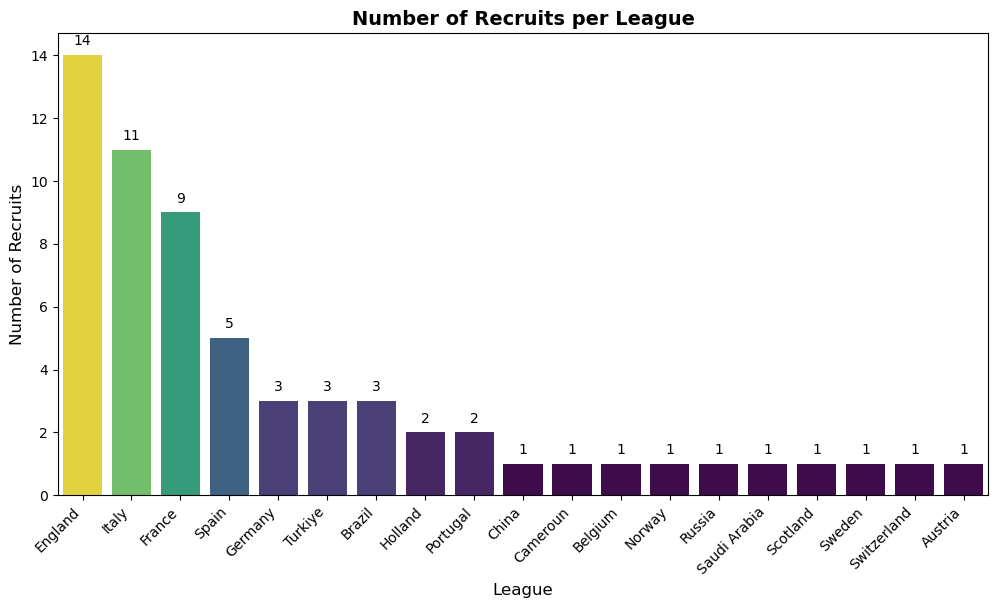

In [337]:
#Count the number of distinct recruits per league
league_counts = df.groupby("Country of Championship")["Name of Player"].nunique().reset_index()
league_counts.columns = ["Country of Championship", "Distinct Recruits"]

#Sort clubs by the number of distinct recruits (descending)
league_counts = league_counts.sort_values(by="Distinct Recruits", ascending=False)

#Create the bar chart
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x="Country of Championship", 
    y="Distinct Recruits",
    hue="Distinct Recruits",
    data=league_counts, 
    palette="viridis",
    legend=False
)

#Add value labels on bars
for bar in bars.containers:
    bars.bar_label(bar, fmt="%d", fontsize=10, padding=5)

#Customize labels
plt.title("Number of Recruits per League", fontsize=14, fontweight="bold")
plt.xlabel("League", fontsize=12)
plt.ylabel("Number of Recruits", fontsize=12)
plt.xticks(rotation=45, ha="right") 

#Show the plot
plt.show()

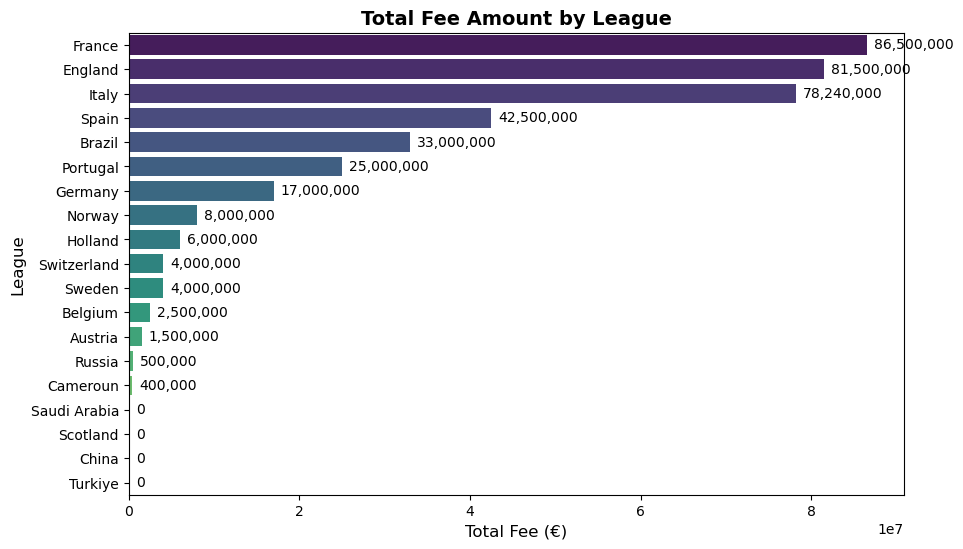

In [323]:
#Group by 'Country of Championship' to calculate total fees
championship_fees = df.groupby("Country of Championship", observed=False)["Fee"].sum().reset_index()

#Sort values by total fee amount (descending)
championship_fees = championship_fees.sort_values(by="Fee", ascending=False)

#Create the bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x="Fee", 
    y="Country of Championship", 
    hue="Country of Championship",  
    data=championship_fees, 
    palette=dict(zip(championship_fees["Country of Championship"], sns.color_palette("viridis", n_colors=len(championship_fees)))), 
    legend=False 
)

#Customize labels
plt.title("Total Fee Amount by League", fontsize=14, fontweight="bold")
plt.xlabel("Total Fee (€)", fontsize=12)
plt.ylabel("League", fontsize=12)

#Add value labels with comma formatting
for container in bars.containers:
    bars.bar_label(container, fmt="{:,.0f}", fontsize=10, padding=5)

#Show the plot
plt.show()

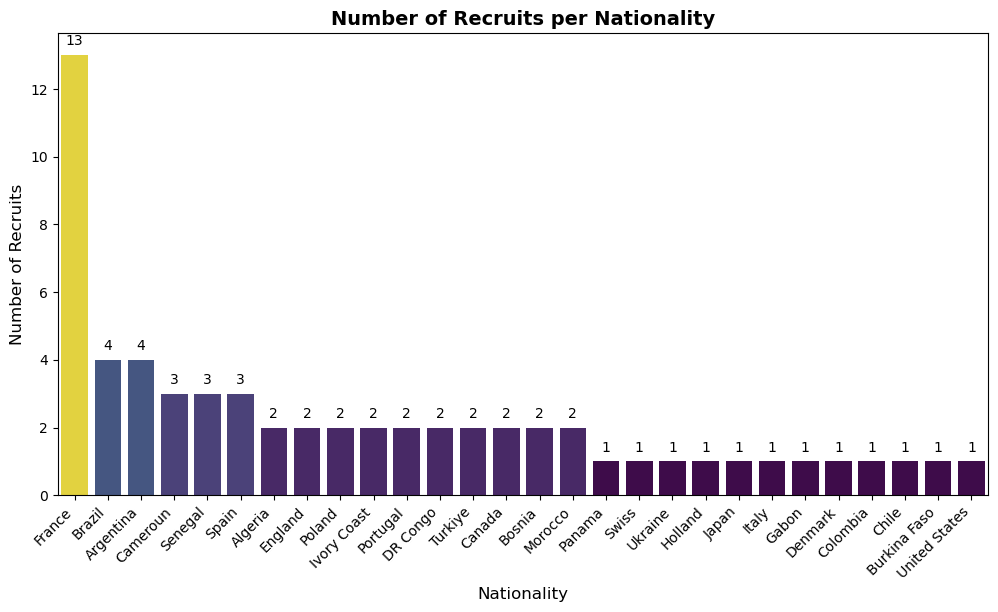

In [329]:
#Count the number of distinct recruits per Nationality
country_counts = df.groupby("Citizenship")["Name of Player"].nunique().reset_index()
country_counts.columns = ["Citizenship", "Distinct Recruits"]

#Sort clubs by the number of distinct recruits (descending)
country_counts = country_counts.sort_values(by="Distinct Recruits", ascending=False)

# Step 3: Create the bar chart
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x="Citizenship", 
    y="Distinct Recruits",
    hue="Distinct Recruits",
    data=country_counts, 
    palette="viridis",
    legend = False
)

#Add value labels on bars
for bar in bars.containers:
    bars.bar_label(bar, fmt="%d", fontsize=10, padding=5)

#Customize labels
plt.title("Number of Recruits per Nationality", fontsize=14, fontweight="bold")
plt.xlabel("Nationality", fontsize=12)
plt.ylabel("Number of Recruits", fontsize=12)
plt.xticks(rotation=45, ha="right")  

#Show the plot
plt.show()

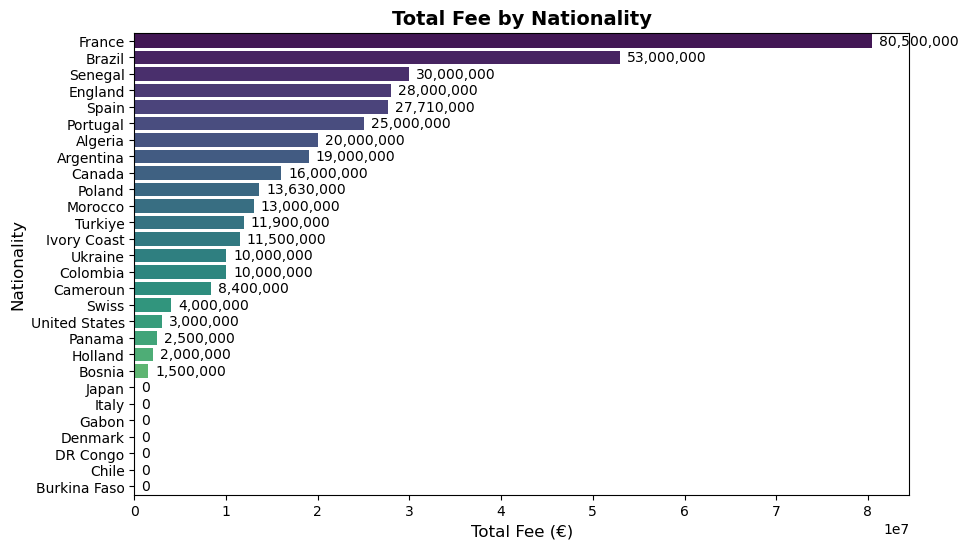

In [331]:
#Group by 'Citizenship' to calculate total fees
citizenship_fees = df.groupby("Citizenship", observed=False)["Fee"].sum().reset_index()

#Sort values by total fee amount (descending)
citizenship_fees = citizenship_fees.sort_values(by="Fee", ascending=False)

#Create the bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x="Fee", 
    y="Citizenship", 
    hue="Citizenship", 
    data=citizenship_fees, 
    palette=dict(zip(citizenship_fees["Citizenship"], sns.color_palette("viridis", n_colors=len(citizenship_fees)))), 
    legend=False  
)

#Customize labels
plt.title("Total Fee by Nationality", fontsize=14, fontweight="bold")
plt.xlabel("Total Fee (€)", fontsize=12)
plt.ylabel("Nationality", fontsize=12)

#Add value labels with comma formatting
for container in bars.containers:
    bars.bar_label(container, fmt="{:,.0f}", fontsize=10, padding=5)

#Show the plot
plt.show()

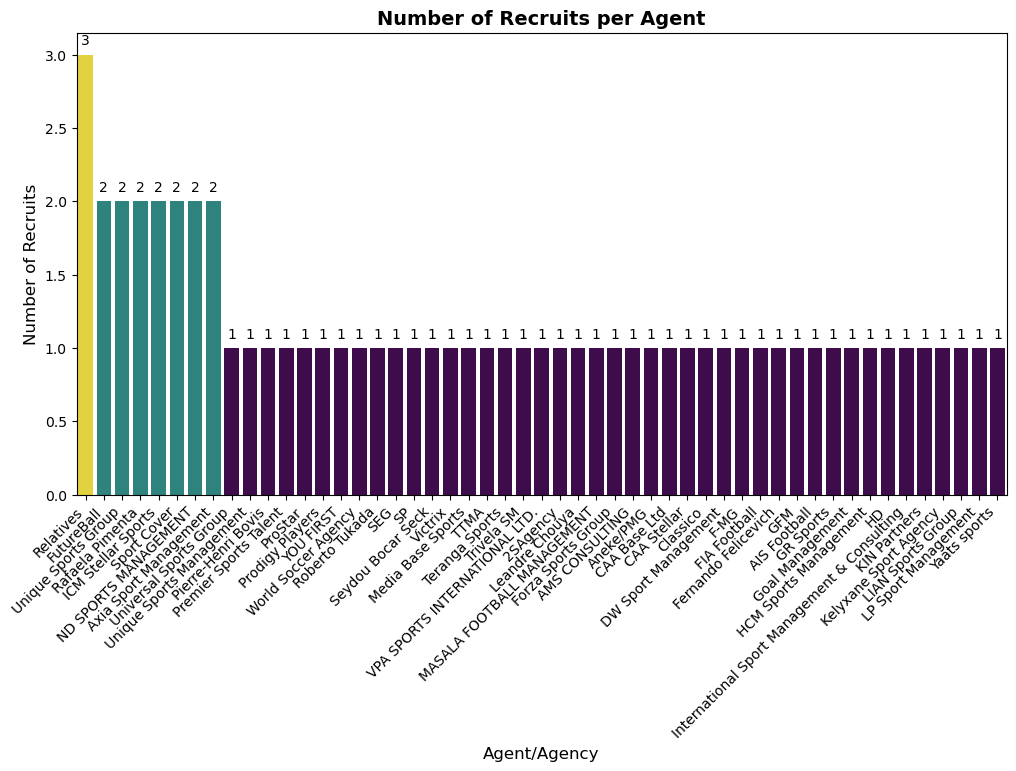

In [335]:
#Count the number of distinct recruits per Agent
agent_counts = df.groupby("Agent/Agency")["Name of Player"].nunique().reset_index()
agent_counts.columns = ["Agent/Agency", "Distinct Recruits"]

#Sort clubs by the number of distinct recruits (descending)
agent_counts = agent_counts.sort_values(by="Distinct Recruits", ascending=False)

#Create the bar chart
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x="Agent/Agency", 
    y="Distinct Recruits",
    hue="Distinct Recruits",
    data=agent_counts, 
    palette="viridis",
    legend=False
)

#Add value labels on bars
for bar in bars.containers:
    bars.bar_label(bar, fmt="%d", fontsize=10, padding=5)

#Customize labels
plt.title("Number of Recruits per Agent", fontsize=14, fontweight="bold")
plt.xlabel("Agent/Agency", fontsize=12)
plt.ylabel("Number of Recruits", fontsize=12)
plt.xticks(rotation=45, ha="right") 

#Show the plot
plt.show()

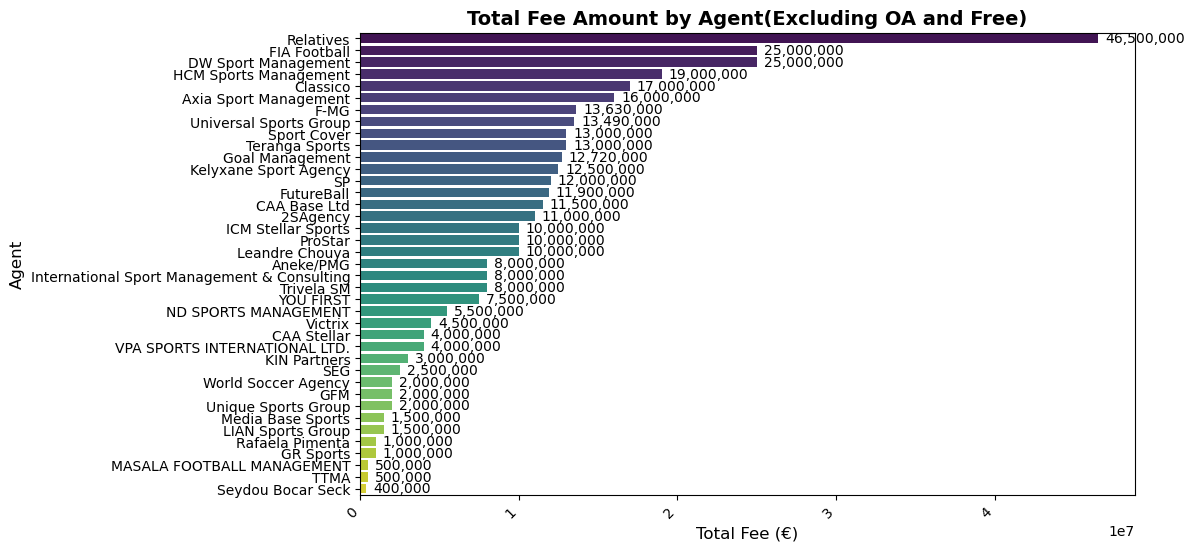

In [285]:
#Group by 'Agent' to calculate total fees
agent_fees = df.groupby("Agent/Agency", observed=False)["Fee"].sum().reset_index()

#Sort values by total fee amount (descending)
agent_fees = agent_fees.sort_values(by="Fee", ascending=False)

#Filter out clubs where total fee is 0
agent_fees = agent_fees[agent_fees["Fee"] > 0]

#Create the bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x="Fee", 
    y="Agent/Agency", 
    hue="Agent/Agency", 
    data=agent_fees, 
    palette=dict(zip(agent_fees["Agent/Agency"], sns.color_palette("viridis", n_colors=len(agent_fees)))), 
    legend=False  
)

#Customize labels
plt.title("Total Fee Amount by Agent(Excluding OA and Free)", fontsize=14, fontweight="bold")
plt.xlabel("Total Fee (€)", fontsize=12)
plt.ylabel("Agent", fontsize=12)

#Add value labels with comma formatting
for container in bars.containers:
    bars.bar_label(container, fmt="{:,.0f}", fontsize=10, padding=5)

#Show the plot
plt.show()